# Regresión

### Importación de bibliotecas requeridas

In [2]:
# Cargar bibliotecas
import pandas as pd
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Diabetes dataset

In [3]:
# Base de datos de diabetes de la India Pima
# Predecir la aparición de diabetes con base en medidas de diagnóstico
# https://www.kaggle.com/uciml/pima-indians-diabetes-database (descárguelo)

# Cargar conjunto de datos
pima = pd.read_csv("diabetes.csv")

In [4]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df_2 = pima[pima['Outcome']==1.0];
df_2 = df_2.iloc[:, 0:-1]

In [7]:
import statsmodels.api as sm

## Construya un modelo de regresión lineal simple donde el nivel de insulina se explique por el nivel de glucosa del paciente.

independent = 'Glucose'
feature_cols = [independent]
X = df_2[feature_cols] # Características (variables independientes)
y = df_2.Insulin # Variable objetivo

## Añade intercepto/constante
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     19.50
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           1.46e-05
Time:                        20:09:31   Log-Likelihood:                -1692.1
No. Observations:                 268   AIC:                             3388.
Df Residuals:                     266   BIC:                             3395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -59.9798     37.214     -1.612      0.108    -133.251      13.292
Glucose        1.1349      0.257      4.416      0.000       0.629       1.641
==============================================================================
Omnibus:                       92.767   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.373
Skew:                           1.578   Prob(JB):                     5.80e-56
Kurtosis:                       6.581   Cond. No.                         658.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Cleaning data

In [8]:
# Replace zeros with NaN in relevant columns
cols_with_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
pima[cols_with_missing] = pima[cols_with_missing].replace(0, np.nan)

# Drop rows with any missing values
pima_clean = pima.dropna()

# Update df_2 to use the cleaned data for Outcome == 1
df_2 = pima_clean[pima_clean['Outcome'] == 1.0].iloc[:, 0:-1]

# Show info of cleaned data
pima_clean.info()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 3 to 765
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 30.6 KB
<class 'pandas.core.frame.DataFrame'>
Index: 130 entries, 4 to 755
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               130 n

### Gráficos de residuos

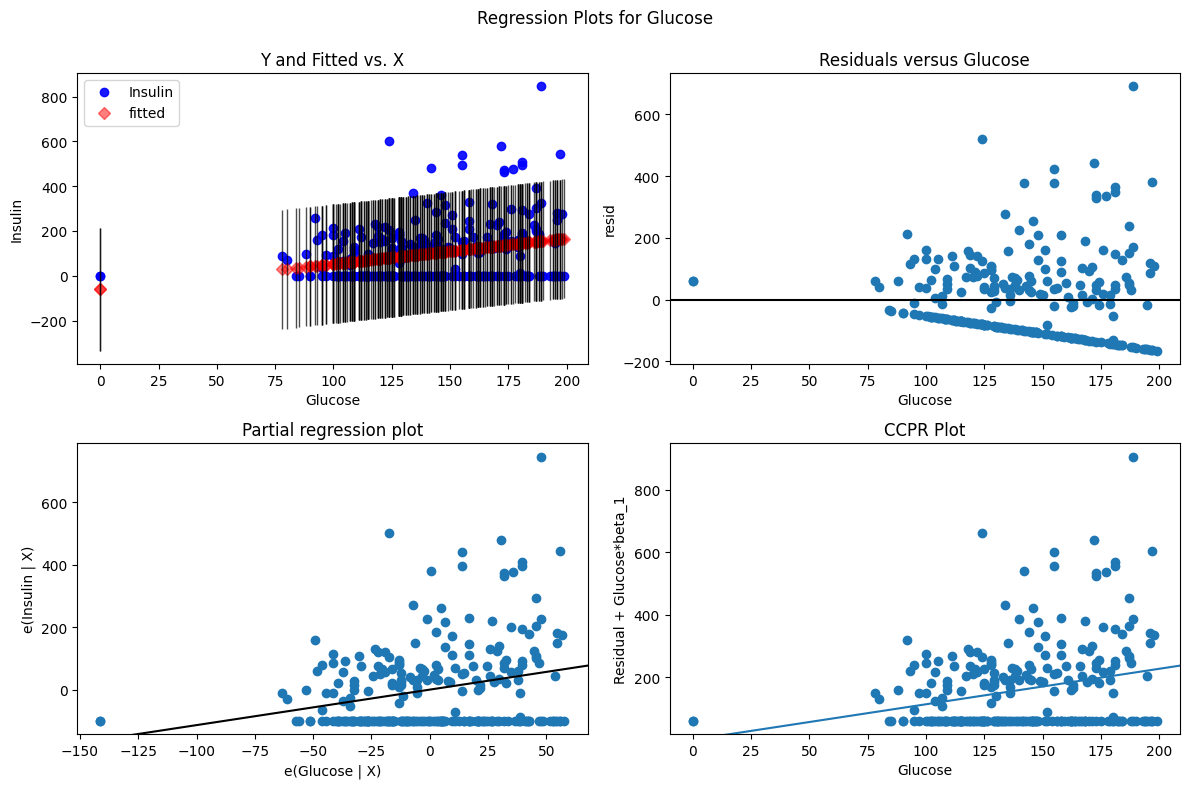

In [9]:
## Grafica los residuos del modelo
## https://www.statsmodels.org/v0.10.2/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html
## https://www.statsmodels.org/devel/examples/notebooks/generated/regression_plots.html

# Define el tamaño de la figura
fig = plt.figure(figsize=(12,8))

# Produce gráficas de regresión
fig = sm.graphics.plot_regress_exog(model, independent, fig=fig)

#### Responda las siguientes preguntas:
- ¿El modelo muestra homocedasticidad?

Que un modelo muestre homocedasticidad significa que la varianza de los errores es constante a lo largo de todas las predicciones. En nuestro caso los residuos parecen aumentar a medida que el valor de la predicción aumenta, lo que indica que los datos no muestran homocedasticidad.

### Práctica 2: Modelos de regresión simple
- Entrene otros cuatro modelos de regresión simple (IMC, Edad, Grosor de la piel, Función Pedigrí de la Diabetes)
- Dibuje los residuos de cada modelo
- Elija el mejor modelo


In [10]:
## Entrene el modelo usando el IMC para predecir la insulina.

independent_bmi = 'BMI'
feature_cols_bmi = [independent_bmi]
X_bmi = df_2[feature_cols_bmi]
y_bmi = df_2.Insulin

X_bmi = sm.add_constant(X_bmi)
model_bmi = sm.OLS(y_bmi, X_bmi).fit()
model_bmi.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                   0.04908
Date:                Sat, 26 Apr 2025   Prob (F-statistic):              0.825
Time:                        20:09:32   Log-Likelihood:                -819.39
No. Observations:                 130   AIC:                             1643.
Df Residuals:                     128   BIC:                             1649.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        220.6477     63.384      3.481      0.001      95.231     346.064
BMI           -0.3858      1.741     -0.222      0.825      -3.831       3.060
==============================================================================
Omnibus:                       60.813   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.487
Skew:                           1.854   Prob(JB):                     3.51e-38
Kurtosis:                       7.253   Cond. No.                         198.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

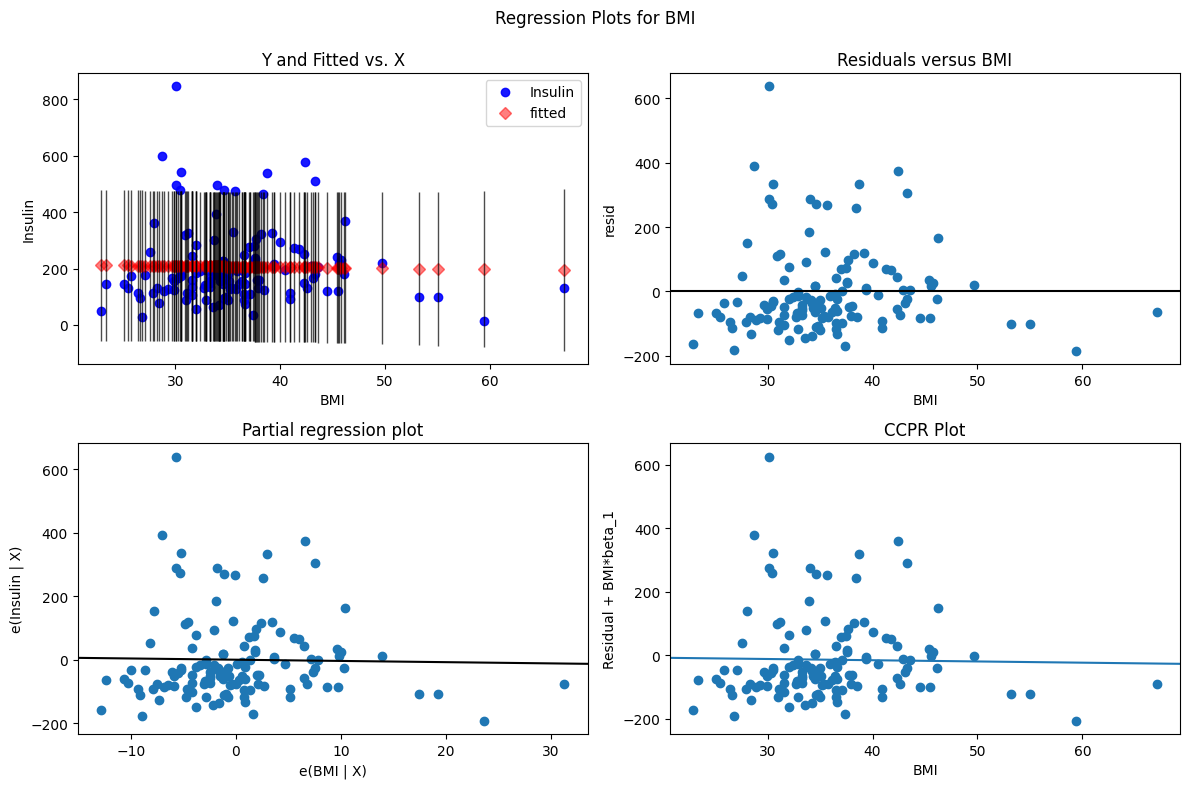

In [11]:
## Dibuje los residuos del modelo que usa el IMC para predecir la insulina.
# Define el tamaño de la figura
fig = plt.figure(figsize=(12,8))

# Produce gráficas de regresión
fig = sm.graphics.plot_regress_exog(model_bmi, independent_bmi, fig=fig)

In [12]:
## Entrene el modelo usando la Edad para predecir la insulina.
independent_age = 'Age'
feature_cols_age = [independent_age]
x_age = df_2[feature_cols_age]
y_age = df_2.Insulin
x_age = sm.add_constant(x_age)
model_age = sm.OLS(y_age, x_age).fit()
model_age.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     6.519
Date:                Sat, 26 Apr 2025   Prob (F-statistic):             0.0118
Time:                        20:09:33   Log-Likelihood:                -816.18
No. Observations:                 130   AIC:                             1636.
Df Residuals:                     128   BIC:                             1642.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        108.1272     40.309      2.682      0.008      28.368     187.886
Age            2.7469      1.076      2.553      0.012       0.618       4.876
==============================================================================
Omnibus:                       55.816   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.527
Skew:                           1.784   Prob(JB):                     6.13e-30
Kurtosis:                       6.479   Cond. No.                         133.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

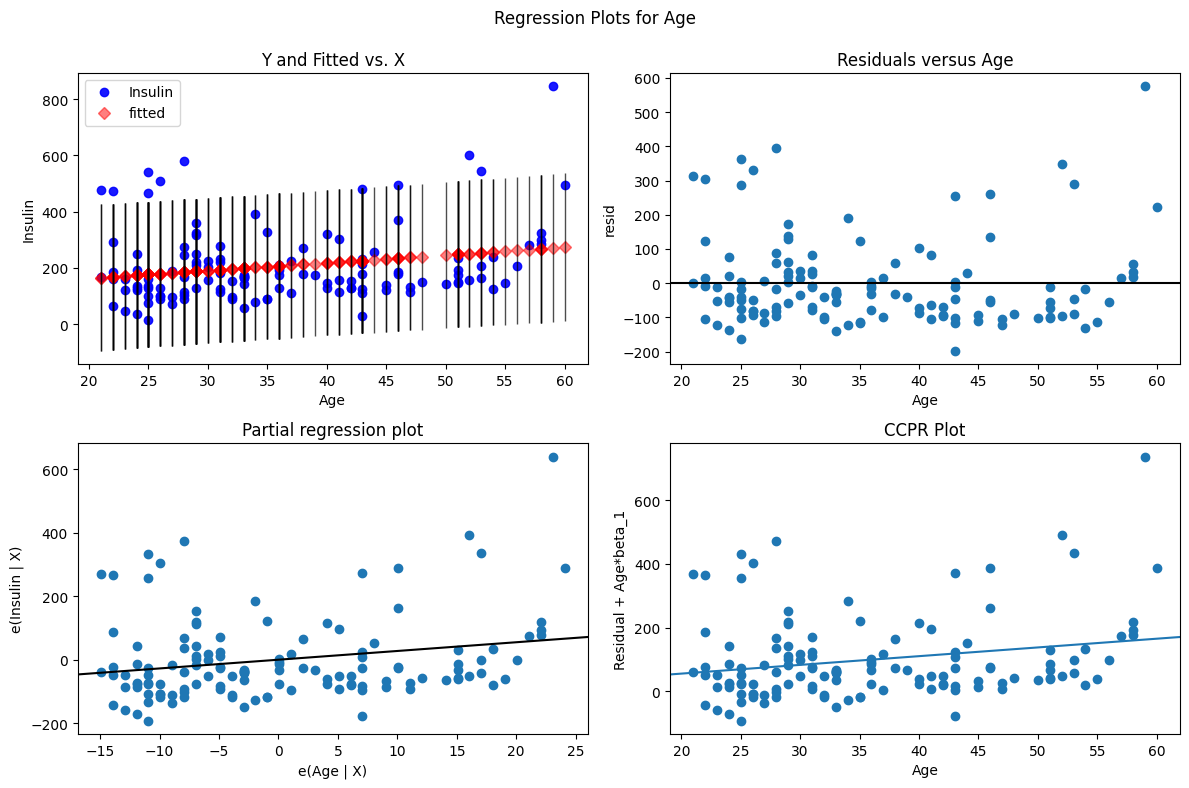

In [13]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_age, independent_age, fig=fig)


In [14]:
## Entrene el modelo usando el Grosor de la piel para predecir la insulina.
independent_skin = 'SkinThickness'
feature_cols_skin = [independent_skin]
x_skin = df_2[feature_cols_skin]
y_skin = df_2.Insulin
x_skin = sm.add_constant(x_skin)
model_skin = sm.OLS(y_skin, x_skin).fit()
model_skin.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.3450
Date:                Sat, 26 Apr 2025   Prob (F-statistic):              0.558
Time:                        20:09:33   Log-Likelihood:                -819.24
No. Observations:                 130   AIC:                             1642.
Df Residuals:                     128   BIC:                             1648.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           183.3283     41.705      4.396      0.000     100.808     265.848
SkinThickness     0.7135      1.215      0.587      0.558      -1.690       3.117
==============================================================================
Omnibus:                       62.445   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              186.671
Skew:                           1.880   Prob(JB):                     2.92e-41
Kurtosis:                       7.509   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

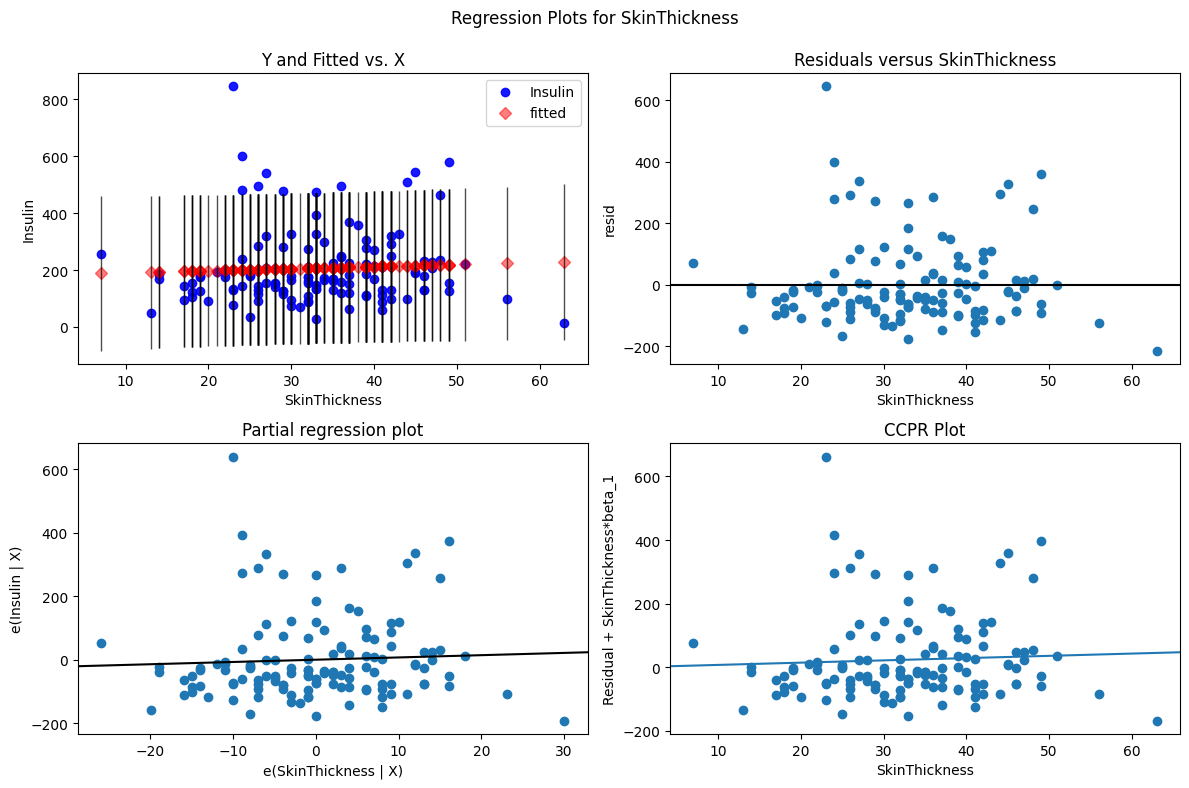

In [15]:
## Dibuje los residuos del modelo que usa el Grosor de la piel para predecir la insulina.
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_skin, independent_skin, fig=fig)

In [16]:
## Entrene el modelo usando DiabetesPedigreeFunction para predecir la insulina.
independent_pedigree = 'DiabetesPedigreeFunction'
feature_cols_pedigree = [independent_pedigree]
x_pedigree = df_2[feature_cols_pedigree]
y_pedigree = df_2.Insulin
x_pedigree = sm.add_constant(x_pedigree)
model_pedigree = sm.OLS(y_pedigree, x_pedigree).fit()
model_pedigree.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.023
Date:                Sat, 26 Apr 2025   Prob (F-statistic):              0.314
Time:                        20:09:34   Log-Likelihood:                -818.89
No. Observations:                 130   AIC:                             1642.
Df Residuals:                     128   BIC:                             1648.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      225.0541     21.439     10.498      0.000     182.634     267.474
DiabetesPedigreeFunction   -29.1054     28.781     -1.011      0.314     -86.054      27.843
==============================================================================
Omnibus:                       60.624   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.469
Skew:                           1.853   Prob(JB):                     9.62e-38
Kurtosis:                       7.211   Cond. No.                         3.56
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

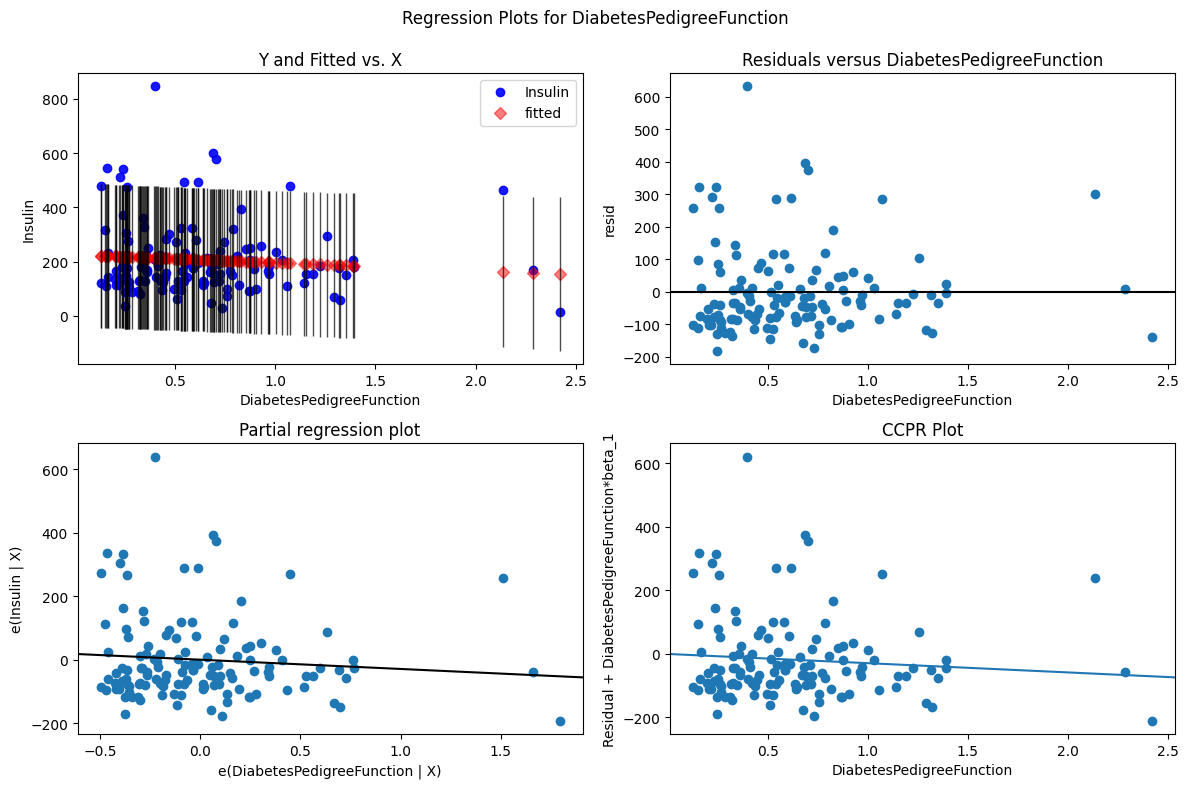

In [17]:
## Dibuje los residuos del modelo que usa DiabetesPedigreeFunction para predecir la insulina.

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_pedigree, independent_pedigree, fig=fig)

#### El mejor modelo es el que usa age para predecir la insulina. Su R² es 0.048 y todos sus coeficientes son significativos.

## Regresión lineal múltiple



In [18]:
## Construya un modelo de regresión lineal múltiple con todas las variables.
feature_cols = [ 'Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','BloodPressure']

df_3 = df_2

X = df_3[feature_cols] # Características (variables independientes)
y = df_3.Insulin # Variable objetivo

In [19]:
import statsmodels.api as sm
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     5.467
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           1.76e-05
Time:                        20:09:35   Log-Likelihood:                -801.68
No. Observations:                 130   AIC:                             1619.
Df Residuals:                     122   BIC:                             1642.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -23.9067     93.491     -0.256      0.799    -208.982     161.169
Glucose                      1.5658      0.362      4.323      0.000       0.849       2.283
BMI                          0.0043      2.004      0.002      0.998      -3.964       3.972
Age                          3.8893      1.312      2.964      0.004       1.291       6.487
DiabetesPedigreeFunction   -35.6414     26.569     -1.341      0.182     -88.237      16.954
SkinThickness                1.5896      1.372      1.159      0.249      -1.126       4.305
Pregnancies                 -5.5419      3.422     -1.619      0.108     -12.317       1.233
BloodPressure               -1.9149      0.874     -2.191      0.030      -3.645      -0.185
==============================================================================
Omnibus:                       41.140   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.091
Skew:                           1.414   Prob(JB):                     1.82e-17
Kurtosis:                       5.496   Cond. No.                     1.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Responda las siguientes preguntas:
- ¿Son significativos todos los coeficientes?
  Parece que la mayoria de los coeficientes son significativos, excepto BMI que tiene un coeficiente de 0.0043, lo cual dependiendo del planteamiento puede ser considerado no probabilisticamente significativo.
- ¿Existe evidencia de multicolinealidad? El valor de condition number deja pensar que si existe multicolinealidad, para aprender mas sobre este tema lei esta [presentación](https://www.sjsu.edu/faculty/guangliang.chen/Math261a/Ch9slides-multicollinearity.pdf). En este caso el valor de condition number es 1.58e+03, lo cual es mayor a 1000.

### Eliminación la multicolinealidad

In [20]:
## Reordena las columnas estableciendo "Insulina" como última columna
df_3 = df_3[['Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','BloodPressure','Insulin']]


In [21]:
## Identifica la colinealidad de cada predictor mediante VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

## Imprimir el coeficiente VIF del dataframe, excepto el de la última columna.
## Un VIF > 10 indica alta multicolinealidad
def printVIF(df):
    for i in range(len(df.columns[:-1])):
        v = vif(np.matrix(df[:-1]),i)
        print("VIF for {}: {}".format(df.columns[i],round(v,2)))


In [22]:
printVIF(df_3)

VIF for Glucose: 24.72
VIF for BMI: 39.37
VIF for Age: 22.59
VIF for DiabetesPedigreeFunction: 3.55
VIF for SkinThickness: 20.43
VIF for Pregnancies: 3.92
VIF for BloodPressure: 35.22


#### Responda las siguientes preguntas:
- ¿Qué variables tienen un VIF superior a 10? Glucose, BMI, Age, SkinThickness, y BloodPressure tienen un VIF superior a 10.
- ¿Qué variables con un valor p alto deberían eliminarse? Recomendaría eliminar las variables que tienen un valor p mayor a 0.05 ya que no son significativas. En este caso empezaria por BMI, que tiene un valor p de 0.998. Despues ir eliminando las variables que tienen un valor p mayor a 0.05 progresivamente probando el modelo después de cada eliminación.
- ¿Qué variables recomendaría VIF eliminar? Recomendaria eliminar las variables empezando por las que tienen un VIF mas alto y ir progresivamente eliminando las variables que tengan un VIF mayor a 10 y al mismo tiempo probar si el modelo mejora después de eliminar cada variable.

In [23]:
# Elimina la presión arterial
df_4 = df_3[['Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','Insulin']]

printVIF(df_4)

VIF for Glucose: 21.99
VIF for BMI: 32.18
VIF for Age: 19.42
VIF for DiabetesPedigreeFunction: 3.51
VIF for SkinThickness: 20.3
VIF for Pregnancies: 3.92


In [24]:
# Elimina la glucosa
df_4 = df_3[['BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','Insulin']]

printVIF(df_4)

VIF for BMI: 28.08
VIF for Age: 16.38
VIF for DiabetesPedigreeFunction: 3.5
VIF for SkinThickness: 20.21
VIF for Pregnancies: 3.89


#### Responda las siguientes preguntas:
- ¿Por qué cambian todos los coeficientes VIF al eliminar una característica? Los coeficientes VIF cambian al eliminar una variable porque el VIF de una variable dependen de cuánto su varianza puede explicarse por las demás variables independientes.
- ¿Podríamos entrenar un modelo sin multicolinealidad con estas 5 variables? Todavia tenemos variables con un VIF mayor a 10, por lo que no podemos entrenar un modelo sin multicolinealidad. Las variables en cuestión son BMI, Age, y SkinThickness.

In [25]:
feature_cols = ['BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies']
X = df_4[feature_cols] # Características (variables independientes)
y = df_4.Insulin # Variable objetivo

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     2.658
Date:                Sat, 26 Apr 2025   Prob (F-statistic):             0.0256
Time:                        20:09:36   Log-Likelihood:                -812.79
No. Observations:                 130   AIC:                             1638.
Df Residuals:                     124   BIC:                             1655.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       83.7358     79.680      1.051      0.295     -73.973     241.445
BMI                         -1.2436      2.125     -0.585      0.559      -5.449       2.962
Age                          4.4733      1.345      3.327      0.001       1.812       7.135
DiabetesPedigreeFunction   -32.4786     28.498     -1.140      0.257     -88.885      23.928
SkinThickness                1.8724      1.473      1.271      0.206      -1.043       4.787
Pregnancies                 -7.7332      3.663     -2.111      0.037     -14.983      -0.483
==============================================================================
Omnibus:                       47.523   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.079
Skew:                           1.613   Prob(JB):                     2.26e-21
Kurtosis:                       5.674   Cond. No.                         434.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Responda las siguientes preguntas:
- ¿Sigue existiendo multicolinealidad? No hay razones para pensar que no existe multicolinealidad, ya que el VIF de las variables sigue siendo mayor a 10 y no se ha eliminado ninguna variable con un VIF mayor a 10.
- ¿Son significativos todos los coeficientes? Si, todos los coeficientes son significativos, ya que todos tienen un coeficiente mayor a 0.05.
- ¿Es significativa la intersección con el eje X? no, ya que para que la intersección con el eje X sea significativa, el valor p debe ser menor a 0.05 y en este caso es 0.025
- ¿Qué variable deberíamos eliminar a continuación? Podriamos eliminar la variable que tiene el valor p mas alto, que en este caso es BMI, ya que tiene un valor p de 0.559, pero otra opción seria eliminar la variable que tiene mayor coeficiente ( o por lo menos, un valor absoluto mayor), que en este caso es DiabetesPedigreeFunction, que tiene un coeficiente de -32.4786

In [26]:
## Eliminar DiabetesPedigreeFunction
feature_cols = ['BMI', 'Age','SkinThickness','Pregnancies']
X = df_4[feature_cols] # Features (independent variables)
y = df_4.Insulin # Target variable

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     2.991
Date:                Sat, 26 Apr 2025   Prob (F-statistic):             0.0213
Time:                        20:09:36   Log-Likelihood:                -813.47
No. Observations:                 130   AIC:                             1637.
Df Residuals:                     125   BIC:                             1651.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            74.2614     79.340      0.936      0.351     -82.762     231.285
BMI              -1.3771      2.124     -0.648      0.518      -5.581       2.826
Age               4.4747      1.346      3.324      0.001       1.810       7.139
SkinThickness     1.6704      1.464      1.141      0.256      -1.227       4.567
Pregnancies      -7.6121      3.666     -2.076      0.040     -14.867      -0.357
==============================================================================
Omnibus:                       46.943   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               93.540
Skew:                           1.593   Prob(JB):                     4.87e-21
Kurtosis:                       5.669   Cond. No.                         431.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
## Eliminar embarazos
feature_cols = ['BMI', 'SkinThickness','Age']
X = df_4[feature_cols] # Características (variables independientes)
y = df_4.Insulin # Variable objetivo

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2.486
Date:                Sat, 26 Apr 2025   Prob (F-statistic):             0.0637
Time:                        20:09:36   Log-Likelihood:                -815.67
No. Observations:                 130   AIC:                             1639.
Df Residuals:                     126   BIC:                             1651.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            87.6345     80.110      1.094      0.276     -70.902     246.171
BMI              -0.8153      2.134     -0.382      0.703      -5.039       3.408
SkinThickness     1.4320      1.478      0.969      0.335      -1.494       4.358
Age               2.8154      1.098      2.565      0.011       0.643       4.988
==============================================================================
Omnibus:                       56.547   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.603
Skew:                           1.783   Prob(JB):                     1.78e-31
Kurtosis:                       6.665   Cond. No.                         429.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
## Eliminar el intercepto
feature_cols = ['BMI', 'SkinThickness','Age']
X = df_4[feature_cols] # Características (variables independientes)
y = df_4.Insulin # Variable objetivo

#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Insulin   R-squared (uncentered):                   0.724
Model:                            OLS   Adj. R-squared (uncentered):              0.717
Method:                 Least Squares   F-statistic:                              110.8
Date:                Sat, 26 Apr 2025   Prob (F-statistic):                    2.65e-35
Time:                        20:09:36   Log-Likelihood:                         -816.29
No. Observations:                 130   AIC:                                      1639.
Df Residuals:                     127   BIC:                                      1647.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
BMI               0.7298      1.601      0.456      0.649      -2.438       3.898
SkinThickness     1.5345      1.477      1.039      0.301      -1.387       4.456
Age               3.5719      0.853      4.187      0.000       1.884       5.260
==============================================================================
Omnibus:                       54.386   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.152
Skew:                           1.734   Prob(JB):                     5.47e-29
Kurtosis:                       6.464   Cond. No.                         11.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
## Eliminar el IMC
feature_cols = ['SkinThickness','Age']
X = df_4[feature_cols] # Características (variables independientes)
y = df_4.Insulin # Variable objetivo

#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Insulin   R-squared (uncentered):                   0.723
Model:                            OLS   Adj. R-squared (uncentered):              0.719
Method:                 Least Squares   F-statistic:                              167.2
Date:                Sat, 26 Apr 2025   Prob (F-statistic):                    2.00e-36
Time:                        20:09:36   Log-Likelihood:                         -816.40
No. Observations:                 130   AIC:                                      1637.
Df Residuals:                     128   BIC:                                      1643.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SkinThickness     2.0974      0.807      2.599      0.010       0.501       3.694
Age               3.7639      0.739      5.090      0.000       2.301       5.227
==============================================================================
Omnibus:                       53.288   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.565
Skew:                           1.704   Prob(JB):                     5.42e-28
Kurtosis:                       6.401   Cond. No.                         4.66
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                                 OLS Regression Results                                
Dep. Variable:                Insulin   R-squared (uncentered):                   0.723
Model:                            OLS   Adj. R-squared (uncentered):              0.719
Method:                 Least Squares   F-statistic:                              167.2
Date:                Sat, 26 Apr 2025   Prob (F-statistic):                    2.00e-36
Time:                        20:09:36   Log-Likelihood:                         -816.40
No. Observations:                 130   AIC:                                      1637.
Df Residuals:                     128   BIC:                                      1643.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

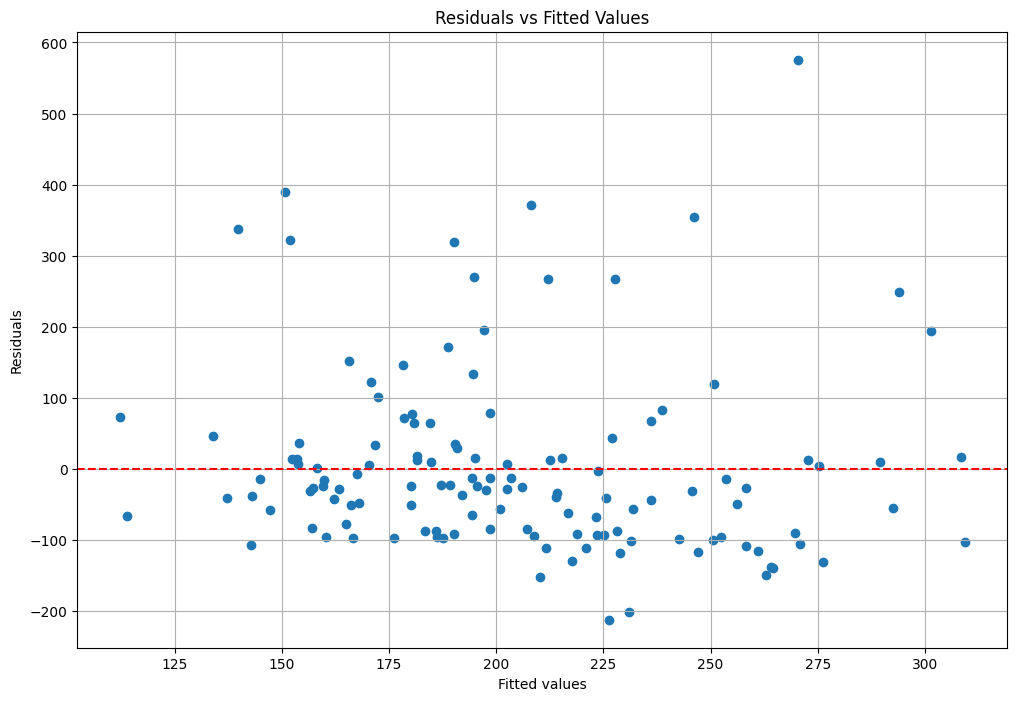

In [30]:
# Print summary statistics
print(est.summary())

# Plot residuals to visually inspect model fit
plt.figure(figsize=(12,8))
plt.scatter(est.fittedvalues, est.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.grid(True)
plt.show()

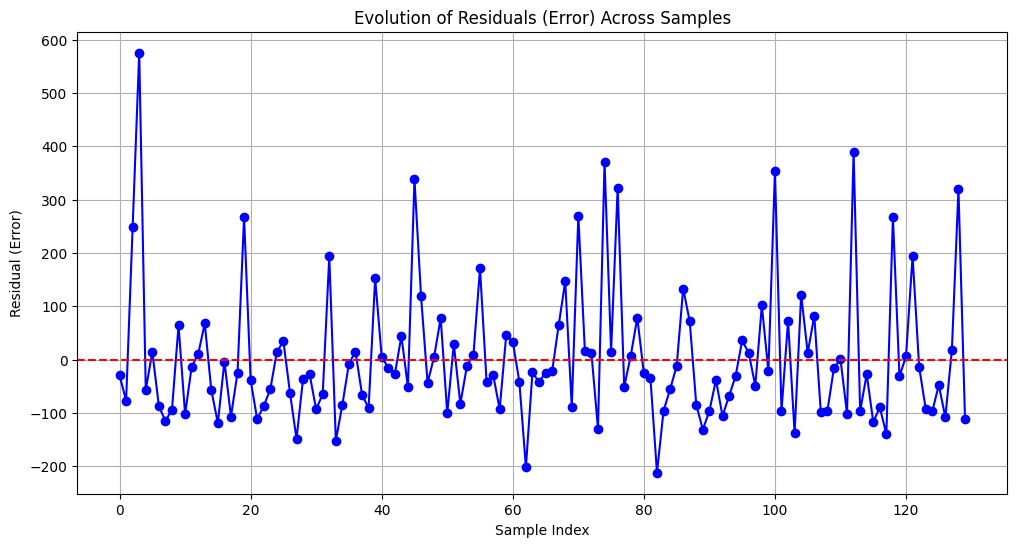

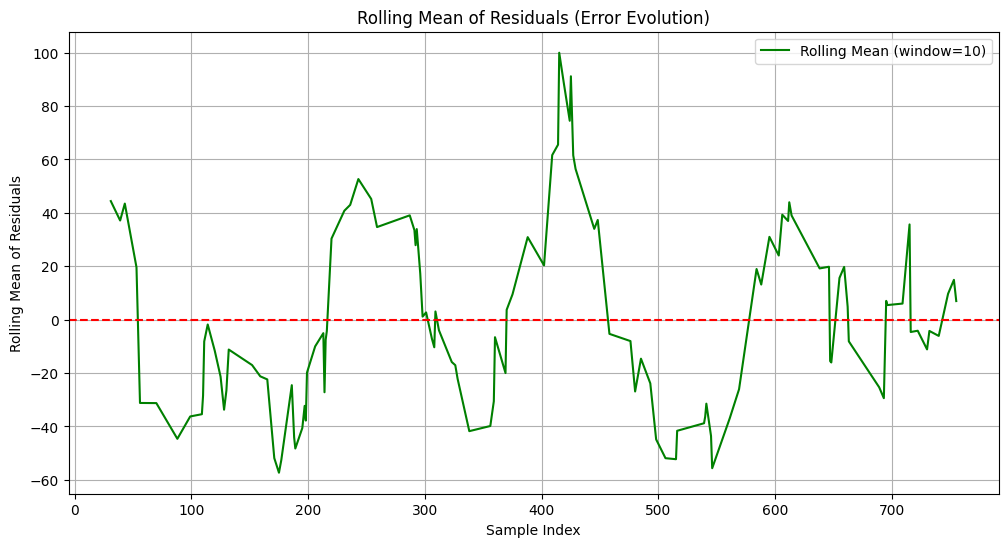

In [31]:
# Analyze the evolution of the error (residuals) for the current model

# Calculate residuals
residuals = est.resid

# Plot residuals over the index (which reflects the order of the samples)
plt.figure(figsize=(12, 6))
plt.plot(residuals.values, marker='o', linestyle='-', color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Residual (Error)')
plt.title('Evolution of Residuals (Error) Across Samples')
plt.grid(True)
plt.show()

# Optionally, plot rolling mean of residuals to see trends
window_size = 10
rolling_mean = residuals.rolling(window=window_size).mean()
plt.figure(figsize=(12, 6))
plt.plot(rolling_mean, color='green', label=f'Rolling Mean (window={window_size})')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Sample Index')
plt.ylabel('Rolling Mean of Residuals')
plt.title('Rolling Mean of Residuals (Error Evolution)')
plt.legend()
plt.grid(True)
plt.show()

#### Answer the following questions:
#### Responda las siguientes preguntas:
- ¿Es significativo este modelo? Aunque no es perfecto, parece que el modelo es significativo ya que el valor de R squared es 0.723, lo que significa que el modelo es capaz de explicar el 72.3% de la varianza de Y basado en X.
- ¿Podemos usarlo para predecir el nivel de insulina? Tenemos un R squared de 0.723, lo que significa que el modelo es capaz de explicar el 72.3% de la varianza de los datos. Esto es un buen resultado, pero no es perfecto.
- ¿Cómo es la ecuación del modelo? 
  La ecuación del modelo es la siguiente:
  Insulin = 2.0974 x SkinThickness + 3.7639 x Age
- Revise la evolución del error. El error varia mucho, pero no parece disminuir, aunque tiende a ser mas fuerte en los extremos positivos que en los negativos.

### Selección de características



In [53]:
df = pd.read_csv("diabetes.csv")
feature_cols = [ 'Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','BloodPressure']
X = df[feature_cols] # Características (variables independientes)
y = df.Insulin # Variable objetivo

n = X.shape[0] # used to calculate f statistics

### Model using Ridge

In [54]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score

# Ridge regression with cross-validation
alphas = [0.01, 0.1, 1, 10, 100]
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X, y)

# Predictions and R2 score
y_pred_ridge = ridge_cv.predict(X)
ridge_r2 = r2_score(y, y_pred_ridge)

# Calculate F-statistic
p_ridge = X.shape[1]  # Ridge usually keeps all coefficients (regularization shrinks, but not to zero)
ridge_f_statistic = (ridge_r2 / p_ridge) / ((1 - ridge_r2) / (n - p_ridge - 1))



print(f"Ridge F-statistic: {ridge_f_statistic:.3f}")
print(f"Best alpha: {ridge_cv.alpha_}")
print(f"R2 score (train): {ridge_r2:.3f}")
print("Coefficients:", dict(zip(X.columns, ridge_cv.coef_)))

Ridge F-statistic: 46.102
Best alpha: 100.0
R2 score (train): 0.298
Coefficients: {'Glucose': 1.203239583983956, 'BMI': -0.5373710589528785, 'Age': -0.4840932976585662, 'DiabetesPedigreeFunction': 10.786862914399496, 'SkinThickness': 3.0402439023597405, 'Pregnancies': -1.7175942656199559, 'BloodPressure': -0.1265643445506565}


### Model using LASSO

In [55]:
from sklearn.linear_model import LassoCV

# LASSO regression with cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X, y)

# Predictions and R2 score
y_pred_lasso = lasso_cv.predict(X)
lasso_r2 = r2_score(y, y_pred_lasso)

# Calculate F-statistic
p_lasso = np.sum(lasso_cv.coef_ != 0)  # number of non-zero predictors
if p_lasso > 0:
    lasso_f_statistic = (lasso_r2 / p_lasso) / ((1 - lasso_r2) / (n - p_lasso - 1))
else:
    lasso_f_statistic = np.nan  # avoid division by zero

print(f"F-statistic: {lasso_f_statistic:.3f}")
print(f"Best alpha: {lasso_cv.alpha_}")
print(f"R2 score (train): {lasso_r2:.3f}")
print("Coefficients:", dict(zip(X.columns, lasso_cv.coef_)))

F-statistic: 52.791
Best alpha: 10.0
R2 score (train): 0.294
Coefficients: {'Glucose': 1.1893686585138454, 'BMI': -0.2773071513419544, 'Age': -0.551721396167091, 'DiabetesPedigreeFunction': 0.0, 'SkinThickness': 3.005348539608807, 'Pregnancies': -0.7700873561806191, 'BloodPressure': -0.12611637821623145}


### Elastic Net

In [56]:
from sklearn.linear_model import ElasticNetCV

# Elastic Net regression with cross-validation
elastic_cv = ElasticNetCV(alphas=alphas, l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5, random_state=42, max_iter=10000)
elastic_cv.fit(X, y)

# Predictions and R2 score
y_pred_elastic = elastic_cv.predict(X)
elastic_r2 = r2_score(y, y_pred_elastic)

# Calculate F-statistic
n = X.shape[0]  # number of samples
p = np.sum(elastic_cv.coef_ != 0)  # number of non-zero predictors
if p > 0:
    elastic_f_statistic = (elastic_r2 / p) / ((1 - elastic_r2) / (n - p - 1))
else:
    elastic_f_statistic = np.nan  # if p=0, F-statistic is not defined

print(f"F-statistic: {elastic_f_statistic:.3f}")

print(f"Best alpha: {elastic_cv.alpha_}")
print(f"Best l1_ratio: {elastic_cv.l1_ratio_}")
print(f"R2 score (train): {elastic_r2:.3f}")
print("Coefficients:", dict(zip(X.columns, elastic_cv.coef_)))

F-statistic: 45.215
Best alpha: 10.0
Best l1_ratio: 0.1
R2 score (train): 0.294
Coefficients: {'Glucose': 1.195835106952365, 'BMI': -0.32859691708228167, 'Age': -0.5786694989131846, 'DiabetesPedigreeFunction': 0.1824098318290639, 'SkinThickness': 2.941245260589012, 'Pregnancies': -0.8600984415430709, 'BloodPressure': -0.12592142122323882}


#### Haga modelos con Ridge, LASSO y Elastic Net (con validación cruzada).
#### Conteste las siguientes preguntas:
- ¿Cuáles son los 2 mejores modelos? Los tres modelos tuvieron un R squared muy similar, pero el modelo LASSO y Elastico Net tuvieron un R squared de 0.294, lo cual es bastante bajo en comparación a nuestro mejor modelo de regresión lineal múltiple anterior.
- ¿Cuál de estos modelos es el mejor (de acuerdo al R2 y la F-statistic)? Tras analyzar los pesos de cada variable, vemos que en efecto presentan differencias, pero ambos tienen un R squared de 0.294. Se diferencian en el valor de la F-statistic, que es 52.791 para LASSO y 45.215 para Elastic net. Por lo tanto, LASSO parece ser el mejor modelo.
- ¿Cuáles parecen ser los coeficientes más relevantes? En el caso de LASSO parece que el coeficiente mas relevante es 'SkinThickness' con un coeficiente de 3.005348539608807, para Elastic Net el coeficiente mas relevante es 'SkinThickness' con un coeficiente de 2.941245260589012, y para Ridge el coeficiente mas relevante es 'DiabetesPedigreeFunction' con un coeficiente de 10.786862914399496